Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 1.3) 전세계 음주 데이터 분석하기

### 바로가기

- [<Step1. 탐색> 데이터의 기초 정보 살펴보기](#<Step1.-탐색>-데이터의-기초-정보-살펴보기)
    - [drinks 데이터셋의 기본 정보]
- [<Step2. 인사이트의 발견> : 탐색과 시각화](#<Step2.-인사이트의-발견>-:-탐색과-시각화)
    - [피처간의 상관관계 탐색]
        - [두 피처간의 상관계수 구하기]
        - [여러 피처의 상관관계 분석]
    - [가장 많이 주문한 item]
    - [주문된 item의 개수]
    - [item당 주문 개수와 총량]
- [<Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색](#<Step3.-탐색적-분석>-:-스무고개로-분석하는-개념적-탐색)
    - [결측 데이터 전처리]
    - [그룹 단위의 데이터 분석 : 대륙별 분석]
    - [그룹 단위의 데이터 분석 : 의미를 가지는 피처 재구성하기]
- [<Step4. 통계적 분석> : 분석 대상간의 통계적 차이 검정하기](#<Step4.-통계적-분석>-:-분석-대상간의-통계적-차이-검정하기)
    - [아프리카와 유럽간의 술 소비량 차이 검정하기]
- [대한민국은 얼마나 술을 독하게 마시는 나라일까?](#대한민국은-얼마나-술을-독하게-마시는-나라일까?)
- [1장 연습 문제](#1장-연습-문제)

-----

In [2]:
%matplotlib inline

# <Step1. 탐색> 데이터의 기초 정보 살펴보기

### [drinks 데이터셋의 기본 정보]

In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = './data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

In [4]:
print(drinks.info()) # 데이터프레임의 기본 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [5]:
drinks.head(10) #처음 10개의 행을 출력

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [6]:
drinks.describe() # 기술 통계 정보를 출력

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


-----

# <Step2. 인사이트의 발견> : 탐색과 시각화

### [피처간의 상관관계 탐색]

##### [두 피처간의 상관계수 구하기]

- 여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 연습을 해봅니다.

In [7]:
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산합니다.
# pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법입니다.
# 피어슨 상관계수는 -1에서 1까지의 값을 가지며, 1에 가까울수록 양의 상관관계를 나타냅니다.
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson') # 'beer_servings'와 'wine_servings' 열 간의 피어슨 상관계수를 계산
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


-----

##### [여러 피처의 상관관계 분석]

In [8]:
# 피처간의 상관계수 행렬을 구합니다.
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


-----

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install seaborn`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [9]:
#!pip install seaborn

-----

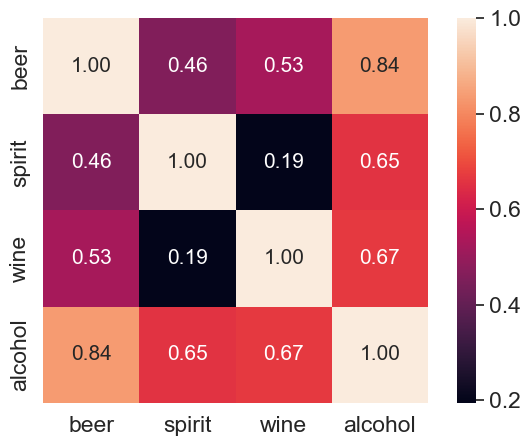

In [10]:
import seaborn as sns # Seaborn 라이브러리를 사용하여 피어슨 상관계수 행렬을 히트맵으로 시각화합니다.

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, #히트맵을 그리는 Seaborn의 함수
            cbar=True, #컬러 바(색상 막대)를 표시
            annot=True, #각 셀에 숫자 값을 표시
            square=True, #정사각형 모양
            fmt='.2f', # 숫자 형식을 소수점 둘째자리까지 표시
            annot_kws={'size': 15}, #표시되는 숫자의 크기를 조절
            yticklabels=cols_view, 
            xticklabels=cols_view) # y축과 x축에 표시되는 레이블을 지정

# 그래프를 더 잘 보이게 하기 위한 레이아웃 조정
plt.tight_layout()
# 그래프 출력
plt.show()



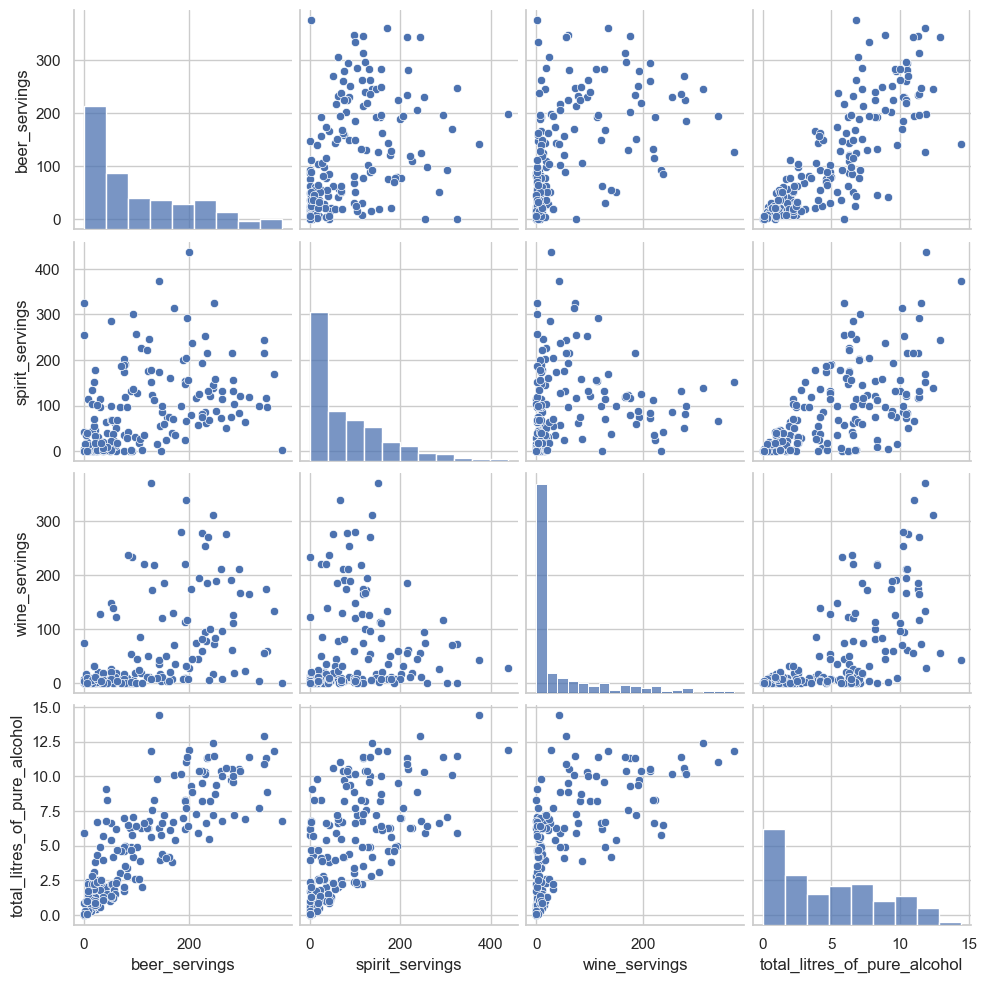

In [11]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook') # Seaborn 스타일 설정   'whitegrid'는 배경에 격자를 표시,'notebook'은 기본 폰트 크기 
sns.pairplot(drinks[['beer_servings', #sns.pairplot(): 주어진 열들에 대한 pair plot을 그림
                     'spirit_servings', 
                     'wine_servings', 
                     'total_litres_of_pure_alcohol']], 
                     height=2.5) #height=2.5: 각 subplot의 크기를 조절
plt.show()

-----

# <Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색

### [결측 데이터 전처리]
- continent column에 대한 결측 데이터 처리 과정

In [12]:
print(drinks.isnull().sum()) # 데이터프레임에서 결측치의 개수를 확인
print("------------------------------------")
print(drinks.dtypes) # 데이터프레임의 각 열의 데이터 타입을 확인

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
------------------------------------
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [13]:
# 결측데이터를 처리합니다 : 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')

In [14]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


-----

##### 파이차트 시각화

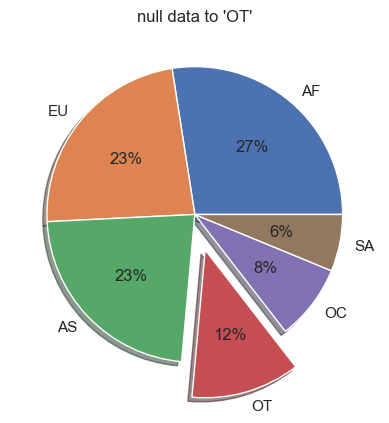

In [15]:
labels = drinks['continent'].value_counts().index.tolist() # 대륙별 레이블
fracs1 = drinks['continent'].value_counts().values.tolist() # 대륙별 개수
explode = (0, 0, 0, 0.25, 0, 0) # 'OT' 부분을 강조하기 위해 튀어나오게 설정


plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True) # 파이 차트를 그림
plt.title('null data to \'OT\'') # 차트에 제목을 추가
plt.show()

-----

### `[미니 퀴즈 - 1.2]`
- `위의 예제 코드에서 두 개의 코드 라인이 있습니다. 두 라인은 각각 어떤 값들을 담고 있을까요?` 
    - drinks['continent'].value_counts().index.tolist()
    - drinks['continent'].value_counts().values.tolist()
- `plt의 pie 함수는 위의 두 코드라인의 결과값을 사용합니다. fracs1과 labels는 어떤 의미를 가지는 파라미터일까요?`
    - 직접 pie 함수를 실행하여 파라미터의 의미를 파악해 봅시다
    - explode를 이용하여 OT 조각을 분리하는 방법에 대해서도 테스트해봅시다.

In [16]:
# 'value_counts()' 메서드는 각 값의 등장 횟수를 세어주며, 'index' 속성은 해당 값들을 리스트로 반환
drinks['continent'].value_counts().index.tolist()

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [17]:
# 'continent' 열의 각 대륙 값에 대한 레이블과 개수를 추출
drinks['continent'].value_counts().values.tolist()

[53, 45, 44, 23, 16, 12]

-----

### [그룹 단위의 데이터 분석 : 대륙별 분석]
##### apply, agg 함수를 이용한 대륙별 분석

In [18]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [19]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_mean = drinks.total_litres_of_pure_alcohol.mean() #'total_litres_of_pure_alcohol' 열의 전체 평균을 계산
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean() # 'continent' 열을 기준으로 'total_litres_of_pure_alcohol' 열의 평균을 대륙별로 계산
continent_over_mean = continent_mean[continent_mean >= total_mean] #대륙별 평균 중에서 전체 평균을 초과하는 대륙을 필터링
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


-----

In [20]:
# 평균 beer_servings이 가장 높은 대륙을 구합니다.
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()#'continent' 열을 기준으로 데이터를 그룹화 +  'beer_servings' 열에 대해서만 + 평균을 계산 +  평균이 가장 큰 대륙의 인덱스를 반환
print(beer_continent)

EU


##### 분석 결과에 대한 시각화

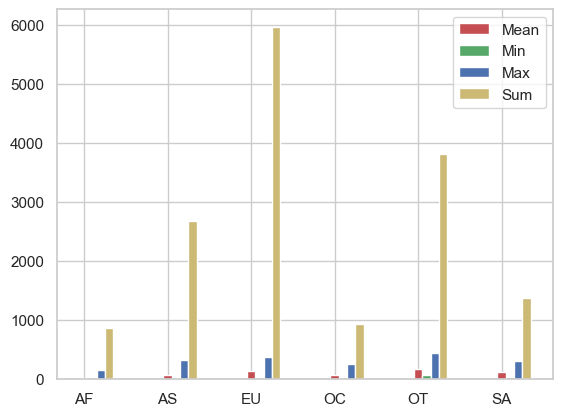

In [29]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result.index) # 대륙의 개수
means = result['mean'].tolist() # 평균
mins = result['min'].tolist() # 최소
maxs = result['max'].tolist() # 최대
sums = result['sum'].tolist() # 합계
 
index = np.arange(n_groups) # x축의 위치를 지정하기 위한 배열을 생성
bar_width = 0.1 # 막대의 너비

#평균, 최소, 최대, 합계를 각각 다른 색으로 표현하는 막대 그래프 그리기 

rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist()) #x축에 대륙 레이블을 표시
plt.legend() # 범례를 추가
plt.show() 

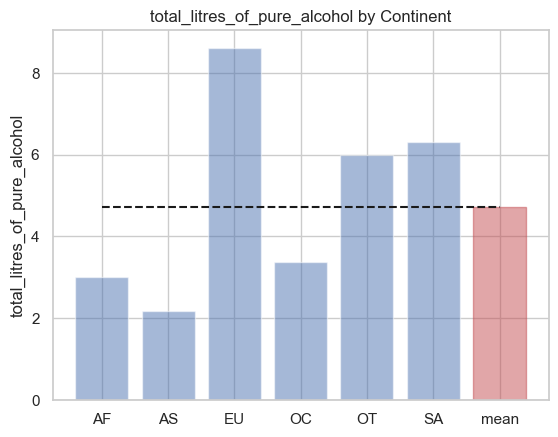

In [22]:
# 대륙별 total_litres_of_pure_alcohol을 시각화합니다.
continents = continent_mean.index.tolist() # 대륙 레이블을 리스트로 가져옴
continents.append('mean') # 'mean'을 추가하여 전체 평균을 나타내는 막대생성
x_pos = np.arange(len(continents)) # x축의 위치를 지정하기 위한 배열을 생성
alcohol = continent_mean.tolist() #  대륙별 평균을 리스트로 가져온 뒤, 
alcohol.append(total_mean)  # mean 을 추가하여 전체 평균을 추가
 

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--") #전체 평균을 나타내는 점선
plt.xticks(x_pos, continents) #  x축에 대륙 레이블을 표시

plt.ylabel('total_litres_of_pure_alcohol') #  y축에 레이블을 추가
plt.title('total_litres_of_pure_alcohol by Continent') # 그래프에 제목을 추가

plt.show()

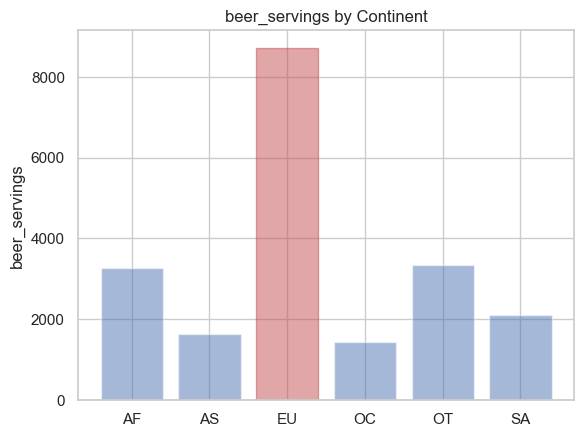

In [23]:
# 대륙별 beer_servings을 시각화합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum() #대륙별 맥주 소비량을 합산한 데이터
continents = beer_group.index.tolist() # 대륙 레이블 리스트
y_pos = np.arange(len(continents)) # y축의 위치를 지정하기 위한 배열을 생성
alcohol = beer_group.tolist() # 대륙별 맥주 소비량 리스트
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r') # 'EU' 대륙의 막대는 빨간색으로 표시
plt.xticks(y_pos, continents) # x축에 대륙 레이블
plt.ylabel('beer_servings') #  y축에 레이블을 추가
plt.title('beer_servings by Continent') # 그래프에 제목을 추가
 
plt.show()

-----

### `[미니 퀴즈 - 1.3]`
- `위의 예제 코드에서 네 개의 코드 라인이 있습니다. 네 라인은 각각 어떤 값들을 담고 있을까요?` 
    - means = result['mean'].tolist()
    - mins = result['min'].tolist()
    - maxs = result['max'].tolist()
    - sums = result['sum'].tolist()
- `위의 예제코드에서 matplotlib의 각종 디자인 기능을 찾아봅시다`
    - 첫 번째 그래프에서 4개의 통계 종류를 나타내는 디자인 기능이 담긴 코드가 어떤 코드인지 찾아보고 실행해 보세요.
    - 두 번째와 세 번째 그래프에서, 하나의 막대만 다르게 색상을 변경하는 코드가 어떤 코드인지 찾아보세요. 그리고 막대를 녹색으로 바꿔보세요.
    - 두 번재 그래프에서 점선을 표현하는 부분의 코드를 찾아보세요. 그리고 점선의 위치도 변경해 봅니다.

In [30]:
# 평균, 최소, 최대, 합계 값을 리스트로 추출하여 출력
means = result['mean'].tolist()
print(means)
mins = result['min'].tolist() 
print(mins)
maxs = result['max'].tolist()
print(maxs)
sums = result['sum'].tolist()
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


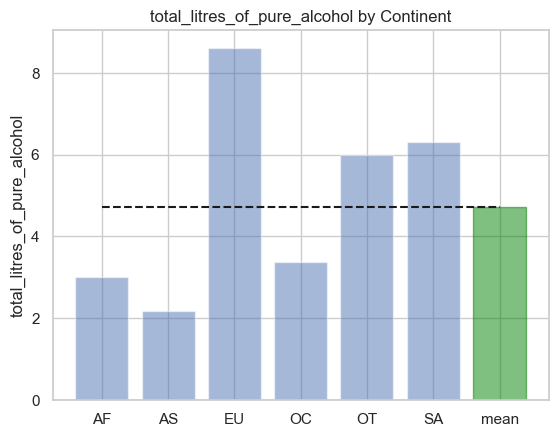

In [25]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 그래프 색상을 변경.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green') # 마지막 막대는 녹색으로 표시.
plt.plot([0., 6], [total_mean, total_mean], "k--") # 전체 평균을 나타내는 점선을 그림.
plt.xticks(x_pos, continents) 

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

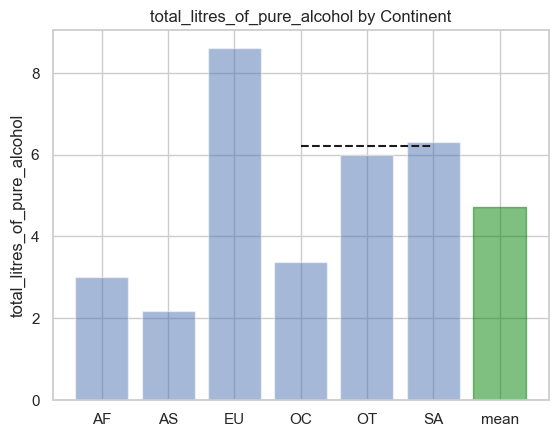

In [26]:
# 대륙별 total_litres_of_pure_alcohol 시각화 - 점선을 변경합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
 
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) - 1].set_color('green') # 마지막 막대는 녹색으로 표시
plt.plot([3., 5], [total_mean + 1.5, total_mean + 1.5], "k--") # 점선의 범위를 [3, 5]로 변경
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

-----

# <Step4. 통계적 분석> : 분석 대상간의 통계적 차이 검정하기

### [아프리카와 유럽간의 맥주 소비량 차이 검정하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지를 설치해 줍니다.
    - (env_name) `pip install scipy`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [31]:
#!pip install scipy

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 634.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   ---------------------------------------- 0.4/43.7 MB 8.3 MB/s eta 0:00:06
    --------------------------------------- 0.8/43.7 MB 10.4 MB/s eta 0:00:05
   - -------------------------------------- 1.3/43.7 MB 10.5 MB/s eta 0:00:05
   - -------------------------------------- 1.9/43.7 MB 10.0 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/43.7 MB 11.0 MB/s eta 0:00:04
   -- ------------------------------------- 3.0/43.7 MB 10.6 MB/s eta 0:00:04
   --- ------------------------------------ 3.5/43.7 MB 11.3 MB/s eta 0:00:04
   --- ------------------------------------ 4.1/43.7 MB 11.4 MB/s eta 0:00:04
  

In [33]:
# 아프리카와 유럽간의 맥주 소비량 차이를 검정합니다.
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings']) # 등분산 가정 하에서의 t-검정
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False) # 등분산 가정 하지 않은 t-검정

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

#################################
# 결과로는 t-통계량과 p-value가 출력. 
# p-value가 유의수준보다 작으면 귀무가설을 기각하게 되며, 
# 두 집단 간에 차이가 있다고 판단할 수 있다.
#################################

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


-----

# 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [35]:
# total_servings 피처를 생성합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처를 생성합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0) # 결측값은 0으로 처리.

# 순위 정보를 생성합니다.
country_with_rank = drinks[['country', 'alcohol_rate']] # 'country'와 'alcohol_rate' 열로 이루어진 데이터프레임을 생성
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0) # 'alcohol_rate'를 기준으로 내림차순 정렬
country_with_rank.head(5) # 상위 5개의 국가 출력

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


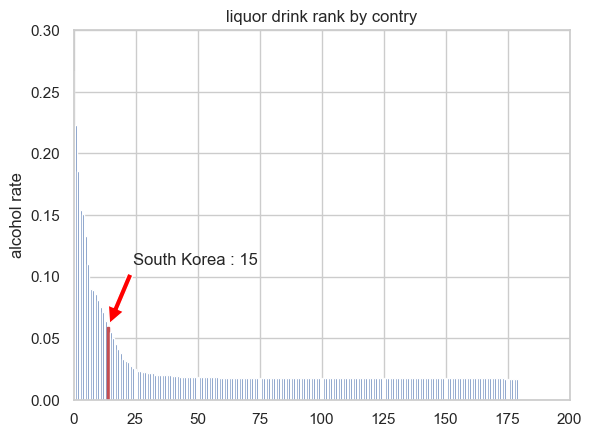

In [36]:
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
# 국가별 순위를 나타내는 막대 그래프를 그림
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r') # 'South Korea' 막대를 빨간색으로 표시

# y축에 레이블과 제목을 추가하고, 그래프의 범위를 지정.
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

# 대한민국의 순위와 알콜 비율을 화살표와 텍스트로 표시.
korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

-----

# 1장 연습 문제
- total_servings : beer_servings, spirit_servings, wine_servings의 합을 통해 실질적인 소비량을 계산
- alcohol_rate : 소비량 대비 알콜 비율을 계산
- alcohol_rate_rank, alcohol_rate_continent 등으로 응용.

In [ ]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = './data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks['continent'] = drinks['continent'].fillna('OT') #  'continent' 열의 결측값을 'OT'로 채움.

-----

### [대륙별 평균 wine_servings 탐색]

In [ ]:
print(drinks['wine_servings'].dtype) # 'wine_servings' 열의 데이터 타입을 출력.

In [37]:
# 대륙별 평균 wine_servings 피처를 만들어서 병합합니다.
# result = drinks.groupby('continent').mean()['wine_servings']
# df = result.to_frame().reset_index()
# df = df.rename(columns={'wine_servings': 'wine_servings_cont_avg'})
# drinks = pd.merge(drinks, df, on='continent', how='outer')

# 위와 같은 방법의 코드입니다.
drinks['wine_servings_cont_avg'] = drinks.groupby('continent')['wine_servings'].transform(np.mean)

C:\Users\hechh\AppData\Local\Temp\ipykernel_3788\528557995.py:8: FutureWarning: The provided callable <function mean at 0x000002320CBE4220> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  drinks['wine_servings_cont_avg'] = drinks.groupby('continent')['wine_servings'].transform(np.mean)


In [38]:
# 결과를 출력합니다.
drinks[['country', 'continent', 'wine_servings_cont_avg']].sample(5).head() # 3개의 열을 선택해서 새로운 데이터 프레임을 만들고 + 그 데이터 프레임에서 5개의 랜덤한 행을 선택 + 선택된 랜덤행중 첫 5개를 출력

,country,continent,wine_servings_cont_avg
45,Czech Republic,EU,142.222222
73,Haiti,OT,24.521739
56,Eritrea,AF,16.264151
83,Italy,EU,142.222222
27,Burundi,AF,16.264151


##### 대륙별 평균 wine_servings 피처 생성 

- groupby 연산 결과를 반환하면, 반환 데이터의 타입은 dataframe 타입이 아닙니다. 따라서 to_frame이라는 함수를 사용하여 dataframe 타입으로 변환한 뒤, 다시 이 dataframe의 index를 reset_index라는 함수로 설정하는 과정이 필요합니다. 그리고 이 과정으로 생성된 dataframe을 원래의 dataframe에 합쳐주어야 합니다. 이를 위해서는 merge 라는 함수를 또 새롭게 적용해야 하지요. 하지만 transform 함수가 있다면, 이 모든 과정을 단 한줄의 코드로 수행할 수 있습니다.


-----

### [국가별 total_servings 피처 생성]

In [39]:
# 국가별 total_servings 피처를 만들어서 병합합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

In [40]:
# 결과를 출력합니다.
drinks[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].sample(5).head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
172,Togo,36,19,2,57
178,Tuvalu,6,9,41,56
98,Lithuania,343,56,244,643
89,Kiribati,21,1,34,56
58,Ethiopia,20,0,3,23


##### 국가별 total_servings 피처 생성 
- group 단위 연산이 아닌, 일반 연산의 경우 간단한 사칙연산 기호만으로 피처를 재구성 할 수 있습니다. drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings'] 처럼 간단한 코드로도, 합계를 계산한 새로운 피처를 만들어 낼 수 있습니다.

-----

### [전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가 구하기]

In [41]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가를 구합니다.
total_mean = drinks.total_litres_of_pure_alcohol.mean() #  전체 평균 알콜 소비량을 계산
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean() # 대륙별 평균 알콜 소비량을 계산
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist() # 전체 평균 이하의 알콜을 섭취하는 대륙의 인덱스를 구함
df_continent_under_mean = drinks.loc[drinks.continent.isin(continent_under_mean)] # 전체 평균 이하의 알콜을 섭취하는 대륙의 국가들을 선택하여 새로운 데이터프레임을 생성

most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()] # spirit_servings가 가장 많은 국가의 데이터를 선택

In [42]:
# 결과를 출력합니다.
most_spirit_under_mean['country']

'Russian Federation'

##### 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가
- group 단위 연산을 적용한 결과를 바탕으로, 원하는 조건을 필터링합니다. 여기에 isin 함수와 dataframe.loc 을 이용하여 전체 평균보다 적은 알코올을 섭취하는 대륙들을 구할 수 있습니다. isin 함수의 사용법을 조금 더 설명하자면, 만약 A[A.column_name.isin(B)] 라는 코드가 있다면, 이것은 A라는 데이터 프레임 중, A의 column_name 피처가 B 안에 포함되어 있는 데이터만을 가져온다는 것입니다. 그리고 loc이라는 것은 반환된 데이터의 위치를 나타내는 것입니다. 이제 이 결과에 idxmax() 함수를 사용하면, 특정 value가 가장 높은 데이터의 index를 찾을 수 있습니다. 이 부분의 코드블럭을 잘게 나누어, 한 줄 한 줄 실행해보며 함수의 사용법을 잘 파악해보도록 합시다.

-----

### [술 소비량 대비 알콜 비율 구하기]

In [ ]:
# 술 소비량 대비 알콜 비율에 대한 칼럼을 만들어서 병합합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0) # 결측값은 0으로 처리

# 술 소비량 대비 알콜 비율 : 전체 순위 중 한국의 순위를 구합니다.
drinks['alcohol_rate_rank'] = drinks['alcohol_rate'].rank(ascending=False)
drinks['alcohol_rate_rank'] = drinks['alcohol_rate_rank'].apply(np.floor)
drinks.loc[drinks['country'] == 'South Korea'].alcohol_rate_rank

##### 술 소비량 대비 알콜 비율에 대한 피처 생성
- 위의 다른 예제들과 동일한 방법을 통해 새로 만들어진 'alcohol_rate' 피처를 기준으로 rank 함수를 적용합니다. 이를 통해 한국(South Korea)이 술 소비량 대비 알콜 비율이 전체 순위 중 몇위인지 찾아봅시다. rank 함수는 특정 column 내에서의 순위값을 반환해주는 함수입니다. 실행 결과, 자랑스럽게도 한국의 술 소비량 대비 알콜 비율은 전체에서 15등을 차지하였습니다.

-----

### [대륙별 술 소비량 대비 알콜 비율 구하기]

In [ ]:
# 대륙별 술 소비량 대비 알콜 비율을 구합니다.
continent_sum = drinks.groupby('continent').sum() #대륙별 합계를 계산
continent_sum['alcohol_rate_continent'] = continent_sum['total_litres_of_pure_alcohol'] / \
                                          continent_sum['total_servings'] # 대륙별 술 소비량 대비 알콜 비율을 계산하여 'alcohol_rate_continent' 열에 추가
continent_sum = continent_sum.reset_index() # 인덱스를 리셋하여 'continent' 열을 열로 변경
continent_sum = continent_sum[['continent', 'alcohol_rate_continent']] # 필요한 열만 선택해서 데이터프레임준비

drinks = pd.merge(drinks, continent_sum, on='continent', how='outer') #대륙별 술 소비량 대비 알콜 비율을 원본 데이터프레임에 병합

In [ ]:
# 결과를 출력합니다.
drinks[['country', 'continent', 'alcohol_rate_continent']].sample(5).head()

##### 대륙별 술 소비량 대비 알콜 비율 피처 생성
- 대륙별 술 소비량 대비 알콜 비율이라는 또 다른 피처를 재구성하였습니다. 이 피처는 위의 예제들의 모든 함수를 골고루 사용하여 생성된 피처입니다. 만약 여러분이 이러한 피처를 자유자재로 생성할 수 있다면, 파이썬을 활용한 데이터 처리 그리고 탐색적 데이터 분석을 어느정도 능숙하게 할 수 있게 된 것입니다.